In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [30]:
#single step bulk and bound return the coefficient by which to multiply dx for change in x and l in simulation (return +/- 1 or 0)
def single_step_bulk(delt,lam,bet):
  #print(delt,lam,bet)
  choose = np.random.choice([-1,0,1],p=[delt/(delt+lam+bet),bet/(delt+lam+bet),lam/(delt+lam+bet)])
  xDisp = choose
  lDisp = abs(choose) - 1
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

def single_step_bound(gam,lam):
  choose = np.random.choice([0,1], p=[gam/(gam+lam),lam/(gam+lam)])
  xDisp = choose
  lDisp = 1 - choose
  rDisp = -1 * lDisp
  return xDisp, lDisp, rDisp

#combine for a single trial
def single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,l0=0,output=False):
  currX = x0
  currL = l0
  currR = R - currL

  currDelta = delt(currX,currL,currR,dx,epsilon)
  currLambda = lam(currX,currL,currR,dx,epsilon)
  currBeta = bet(currX,currL,currR,dx,epsilon)
  currGamma = gam(currX,currL,currR,dx,epsilon)

  reachedR = -1

  # if(currR <= 0):
  #   reachedR = 1
  #   print("R is already reached")
  #   return reachedR

  while_counter = 0
  while(currX < b and (currL < R or currX > 0)):
    while_counter += 1
    #reevaluating rates based on whatever functions they are (defined I'm assuming in terms of some combination of x, l, and r)
    currDelta = delt(currX,currL,currR,dx,epsilon)
    currLambda = lam(currX,currL,currR,dx,epsilon)
    currBeta = bet(currX,currL,currR,dx,epsilon)
    currGamma = gam(currX,currL,currR,dx,epsilon)
    #taking a step!
    if(currX > 0):
      xDisp,lDisp,rDisp = single_step_bulk(currDelta,currLambda,currBeta)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
    elif(currX <= 0):
      currX = 0
      currGamma = gam(currX,currL,currR,dx,epsilon)
      currLambda = lam(currX,currL,currR,dx,epsilon)
      xDisp,lDisp,rDisp = single_step_bound(currGamma,currLambda)
      currX += xDisp * dx
      currL += lDisp * dx
      currR = R - currL
    else:
      if(output):
        print("edge case: exiting after " + str(while_counter) + " iterations")
    #print(currL)

  if(output):
    print("success! exiting after " + str(while_counter) + " iterations")

  if(currX >= b):
    reachedR = 0
  elif(currL >= R or currR <= 0):
    reachedR = 1

  return reachedR


In [18]:
#monte carlo
def get_prob_number(num_trials,x0,dx,R,b,delt,lam,bet,gam,epsilon,l00=0,outputt=False):
  total = 0
  for i in range(num_trials):
    total += single_trial(x0,dx,R,b,delt,lam,bet,gam,epsilon,l0=l00,output=outputt)
  return total/float(num_trials)

# trying 1/ln(r+1) for beta and gamma

In [19]:
#defining an unbiased walk to start, with beta = gamma = 1/(r+epsilon)
#setting dt = 1 (can i do that?)
def lambdaa(x,l,r,dx,epsilon):
  return (r+epsilon)/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (r+epsilon)/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

epsilon = 1
single_trial(.3,.1,1,50,deltaa,lambdaa,betaa,gammaa,epsilon,l0 = .9,output=True)

single_trial(.3,.1,1,50,deltaa,lambdaa,betaa,gammaa,epsilon,l0 = 1,output=True)

success! exiting after 4 iterations
success! exiting after 3 iterations


1

In [20]:
#trying beta = gamma = 1/(ln(r+1))
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (np.log(r+1))/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (np.log(r+1))/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)

with open('/Users/Greencat/sustainability-simulations/random_walk_results/log.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0


In [21]:
PROBS

array([[1.  , 0.36, 0.44, 0.12, 0.04],
       [0.76, 0.4 , 0.32, 0.2 , 0.12],
       [0.56, 0.28, 0.32, 0.  , 0.  ],
       [0.24, 0.16, 0.08, 0.12, 0.12],
       [0.16, 0.  , 0.04, 0.  , 0.  ]])

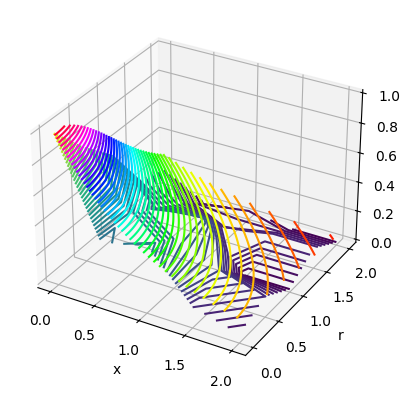

2.3073998940514273
0.09229599576205709


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

TX, TR = np.meshgrid(trialX, trialR)

def P(x,r):
    return np.exp(-1)*np.exp(-(r+1)*(np.log(r+1)-1)) * np.exp(-x)

errs = []

x = np.linspace(0, 2, 100)
r = np.linspace(0, 2, 200)

X, R = np.meshgrid(x, r)
Z = np.empty((200,100))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = P(x[j],r[i])

    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, R, Z, 50, cmap=cm.hsv)
ax.contour3D(TX,TR,PROBS,50,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()
    
errorSum = 0
for i in range(len(trialR)):
    for j in range(len(trialX)):
        errorSum += abs(PROBS[i][j] - P(trialX[j],trialR[i]))
print(errorSum)
print(errorSum/(len(trialR)*len(trialX)))


# trying 1/(1-e^(-r))

## variant 1

In [23]:
#trying beta = gamma = 1/(ln(r+1))
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return (1-np.exp(-r))/(dx**2)

def deltaa(x,l,r,dx,epsilon):
  return (1-np.exp(-r))/(dx**2)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx**2)

def betaa(x,l,r,dx,epsilon):
  return 1/dx

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)

with open('/Users/Greencat/sustainability-simulations/random_walk_results/expRise1.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.0  x: 0.0
r: 0.0  x: 0.5
r: 0.0  x: 1.0
r: 0.0  x: 1.5
r: 0.0  x: 2.0
r: 0.5  x: 0.0
r: 0.5  x: 0.5
r: 0.5  x: 1.0
r: 0.5  x: 1.5
r: 0.5  x: 2.0
r: 1.0  x: 0.0
r: 1.0  x: 0.5
r: 1.0  x: 1.0
r: 1.0  x: 1.5
r: 1.0  x: 2.0
r: 1.5  x: 0.0
r: 1.5  x: 0.5
r: 1.5  x: 1.0
r: 1.5  x: 1.5
r: 1.5  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0


In [24]:
PROBS

array([[1.  , 0.36, 0.28, 0.16, 0.04],
       [0.76, 0.32, 0.4 , 0.12, 0.04],
       [0.4 , 0.36, 0.36, 0.2 , 0.04],
       [0.4 , 0.32, 0.12, 0.12, 0.08],
       [0.28, 0.12, 0.08, 0.04, 0.  ]])

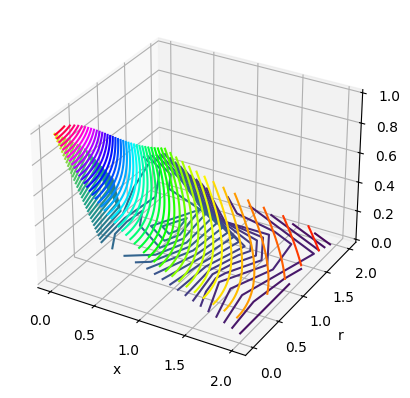

2.070300970332942
0.08281203881331768


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

TX, TR = np.meshgrid(trialX, trialR)

def P(x,r):
    return np.exp(1)*np.exp(-r-np.exp(-r)) * np.exp(-x)

errs = []

x = np.linspace(0, 2, 100)
r = np.linspace(0, 2, 200)

X, R = np.meshgrid(x, r)
Z = np.empty((200,100))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = P(x[j],r[i])

    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, R, Z, 50, cmap=cm.hsv)
ax.contour3D(TX,TR,PROBS,50,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()
    
errorSum = 0
for i in range(len(trialR)):
    for j in range(len(trialX)):
        errorSum += abs(PROBS[i][j] - P(trialX[j],trialR[i]))
print(errorSum)
print(errorSum/(len(trialR)*len(trialX)))


## variant 2

In [31]:
#trying beta = gamma = 1/(ln(r+1))
num_trials = 25
BIGR = 2
trialX = np.linspace(0,2,5)
trialR = np.linspace(0.01,2,5) # making the dimensions for my own orientation purposes

X, R = np.meshgrid(trialX, trialR)
PROBS = np.empty((5,5))
#dims are PROBS[r][x]

def lambdaa(x,l,r,dx,epsilon):
  return 1/(dx)

def deltaa(x,l,r,dx,epsilon):
  return 1/(dx)

def gammaa(x,l,r,dx,epsilon):
  return 1/(dx*(1-np.exp(-r)))

def betaa(x,l,r,dx,epsilon):
  return 1/(1-np.exp(-r))

for r in range(len(PROBS)):
  for x in range(len(PROBS[r])):
    print("r: "+str(trialR[r])+"  x: " + str(trialX[x]))
    PROBS[r][x]=get_prob_number(num_trials,trialX[x],.1,BIGR,50,deltaa,lambdaa,betaa,gammaa,epsilon,l00 = BIGR-trialR[r],outputt=False)

with open('/Users/Greencat/sustainability-simulations/random_walk_results/expRise2.csv', 'w') as f:
  writer = csv.writer(f)
  writer.writerows(PROBS)

r: 0.01  x: 0.0
r: 0.01  x: 0.5
r: 0.01  x: 1.0
r: 0.01  x: 1.5
r: 0.01  x: 2.0
r: 0.5075  x: 0.0
r: 0.5075  x: 0.5
r: 0.5075  x: 1.0
r: 0.5075  x: 1.5
r: 0.5075  x: 2.0
r: 1.005  x: 0.0
r: 1.005  x: 0.5
r: 1.005  x: 1.0
r: 1.005  x: 1.5
r: 1.005  x: 2.0
r: 1.5025  x: 0.0
r: 1.5025  x: 0.5
r: 1.5025  x: 1.0
r: 1.5025  x: 1.5
r: 1.5025  x: 2.0
r: 2.0  x: 0.0
r: 2.0  x: 0.5
r: 2.0  x: 1.0
r: 2.0  x: 1.5
r: 2.0  x: 2.0


In [33]:
PROBS

array([[1.  , 0.48, 0.4 , 0.28, 0.04],
       [0.96, 0.6 , 0.28, 0.16, 0.08],
       [0.72, 0.36, 0.12, 0.12, 0.08],
       [0.32, 0.16, 0.08, 0.04, 0.  ],
       [0.24, 0.16, 0.04, 0.08, 0.08]])

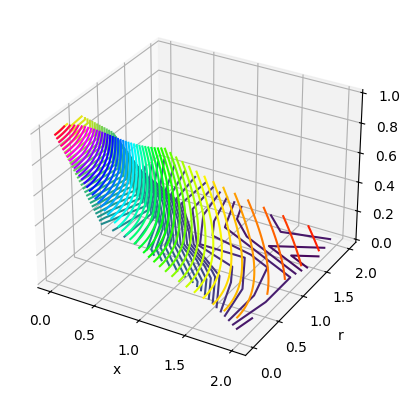

1.6007039886365224
0.0640281595454609


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

TX, TR = np.meshgrid(trialX, trialR)

def P(x,r):
    return np.exp(1)*np.exp(-r-np.exp(-r)) * np.exp(-x)

errs = []

x = np.linspace(0, 2, 100)
r = np.linspace(0, 2, 200)

X, R = np.meshgrid(x, r)
Z = np.empty((200,100))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i][j] = P(x[j],r[i])

    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, R, Z, 50, cmap=cm.hsv)
ax.contour3D(TX,TR,PROBS,50,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()
    
errorSum = 0
for i in range(len(trialR)):
    for j in range(len(trialX)):
        errorSum += abs(PROBS[i][j] - P(trialX[j],trialR[i]))
print(errorSum)
print(errorSum/(len(trialR)*len(trialX)))


## comparing the two variations

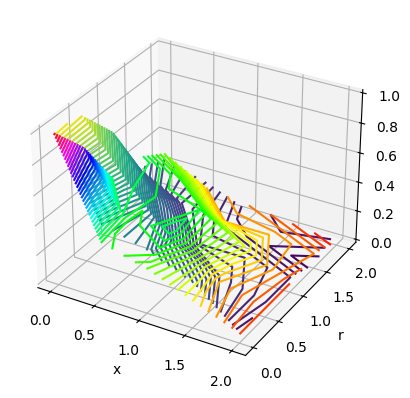

In [34]:
trialX1 = np.linspace(0,2,5)
trialR1 = np.linspace(0,2,5)
trialX2 = np.linspace(0,2,5)
trialR2 = np.linspace(0.01,2,5)

X1, R1 = np.meshgrid(trialX1, trialR1)
X2, R2 = np.meshgrid(trialX2, trialR2)

PROBS1 = [[1.  , 0.36, 0.28, 0.16, 0.04],
       [0.76, 0.32, 0.4 , 0.12, 0.04],
       [0.4 , 0.36, 0.36, 0.2 , 0.04],
       [0.4 , 0.32, 0.12, 0.12, 0.08],
       [0.28, 0.12, 0.08, 0.04, 0.  ]]
PROBS2 = [[1.  , 0.48, 0.4 , 0.28, 0.04],
       [0.96, 0.6 , 0.28, 0.16, 0.08],
       [0.72, 0.36, 0.12, 0.12, 0.08],
       [0.32, 0.16, 0.08, 0.04, 0.  ],
       [0.24, 0.16, 0.04, 0.08, 0.08]]

errs = []

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, R1, PROBS1, 50, cmap=cm.hsv)
ax.contour3D(X2,R2,PROBS2,50,cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('r')
ax.set_zlabel('Pi')
#ax.set_title('L(l,x) 2D case, a = 5, b = 20, r = 5')
plt.show()
